# Iris dataset for Machine Learning

In [47]:
#Импортим нужные библиотеки:
import numpy as np
import pandas as pd

from sklearn import datasets
from sklearn import linear_model
from sklearn.cluster import KMeans
from sklearn import cross_validation
from sklearn import metrics 
from pandas import DataFrame

%pylab inline


Populating the interactive namespace from numpy and matplotlib


C:\Users\Alexey.Sushkov\AppData\Local\Continuum\Anaconda3\envs\py27\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['norm', 'clf']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [48]:
# Загружаем набор данных:
iris = datasets.load_iris()
# Смотрим на названия переменных
print iris.feature_names
# Смотрим на данные, выводим 10 первых строк: 
print iris.data[:10]
# Смотрим на целевую переменную:
print iris.target_names
print iris.target

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]
 [ 5.4  3.9  1.7  0.4]
 [ 4.6  3.4  1.4  0.3]
 [ 5.   3.4  1.5  0.2]
 [ 4.4  2.9  1.4  0.2]
 [ 4.9  3.1  1.5  0.1]]
['setosa' 'versicolor' 'virginica']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [49]:
iris

{'DESCR': 'Iris Plants Database\n====================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)\n    ============== ==== ==== ======= ===== ==

In [50]:
iris_frame = DataFrame(iris.data)
# Делаем имена колонок такие же, как имена переменных:
iris_frame.columns = iris.feature_names
# Добавляем столбец с целевой переменной:  
iris_frame['target'] = iris.target
# Для наглядности добавляем столбец с сортами:  
iris_frame['name'] = iris_frame.target.apply(lambda x : iris.target_names[x])
# Смотрим, что получилось:
iris_frame

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
5,5.4,3.9,1.7,0.4,0,setosa
6,4.6,3.4,1.4,0.3,0,setosa
7,5.0,3.4,1.5,0.2,0,setosa
8,4.4,2.9,1.4,0.2,0,setosa
9,4.9,3.1,1.5,0.1,0,setosa


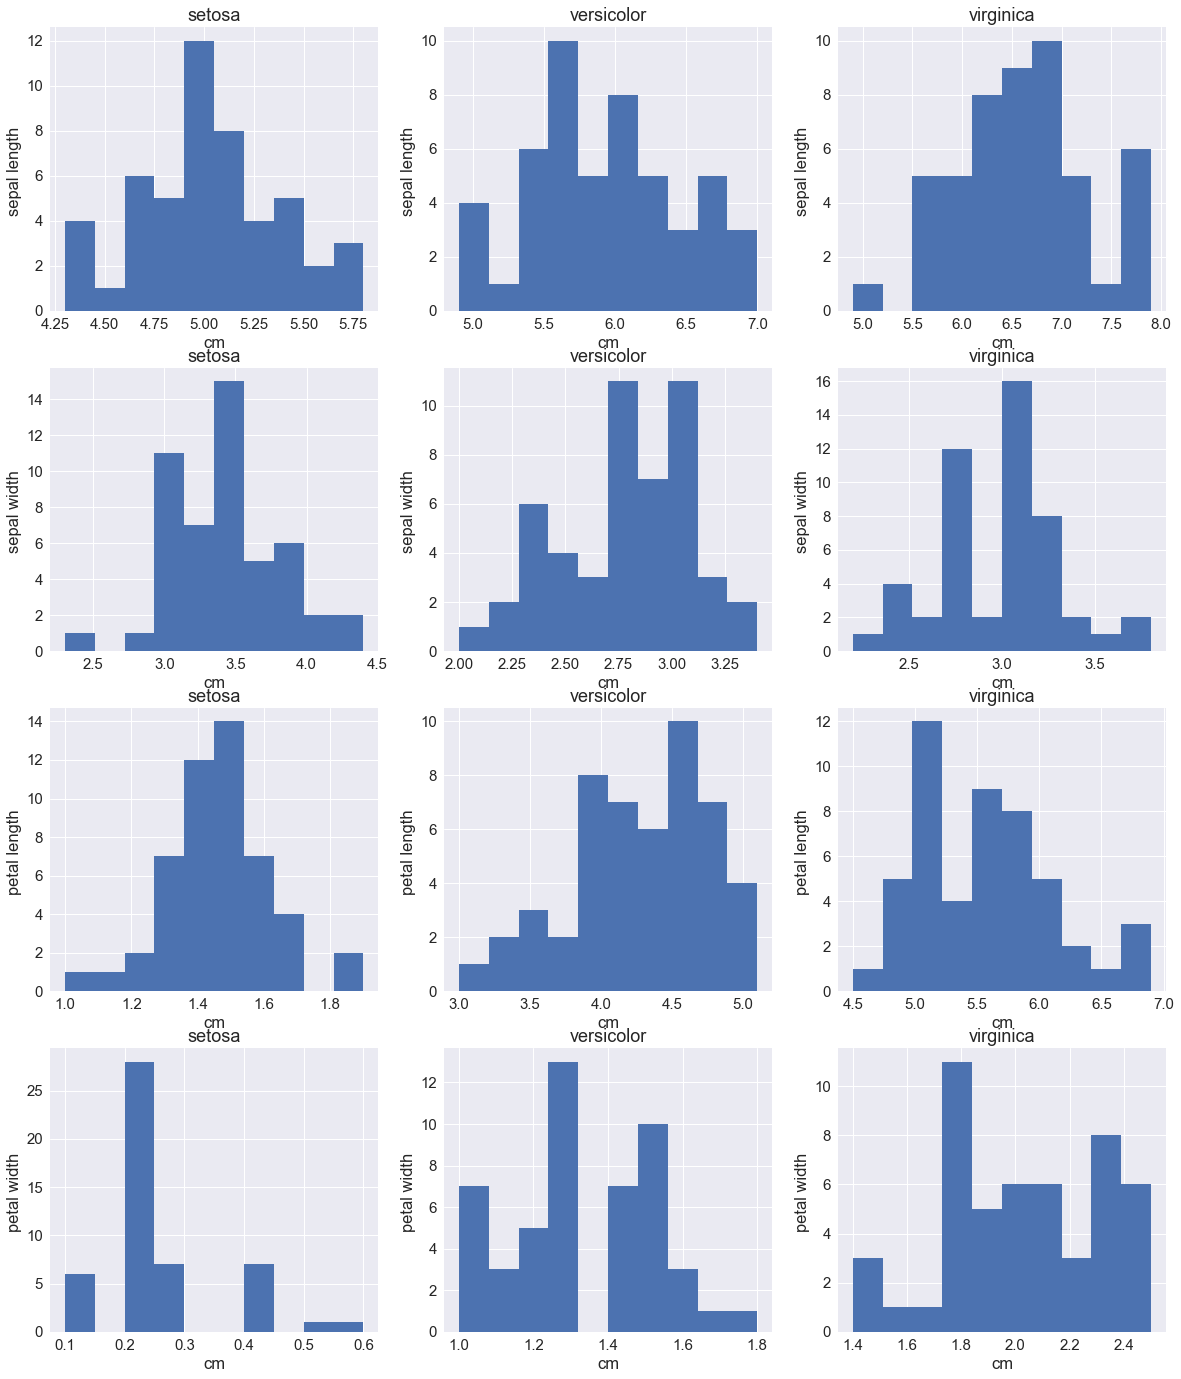

In [51]:
# Строим гистограммы по каждому признаку: 
pyplot.figure(figsize(20, 24))
plot_number = 0
for feature_name in iris['feature_names']:
    for target_name in iris['target_names']:
        plot_number += 1
        pyplot.subplot(4, 3, plot_number)
        pyplot.hist(iris_frame[iris_frame.name == target_name][feature_name])
        pyplot.title(target_name)
        pyplot.xlabel('cm')
        pyplot.ylabel(feature_name[:-4])

# pairplot

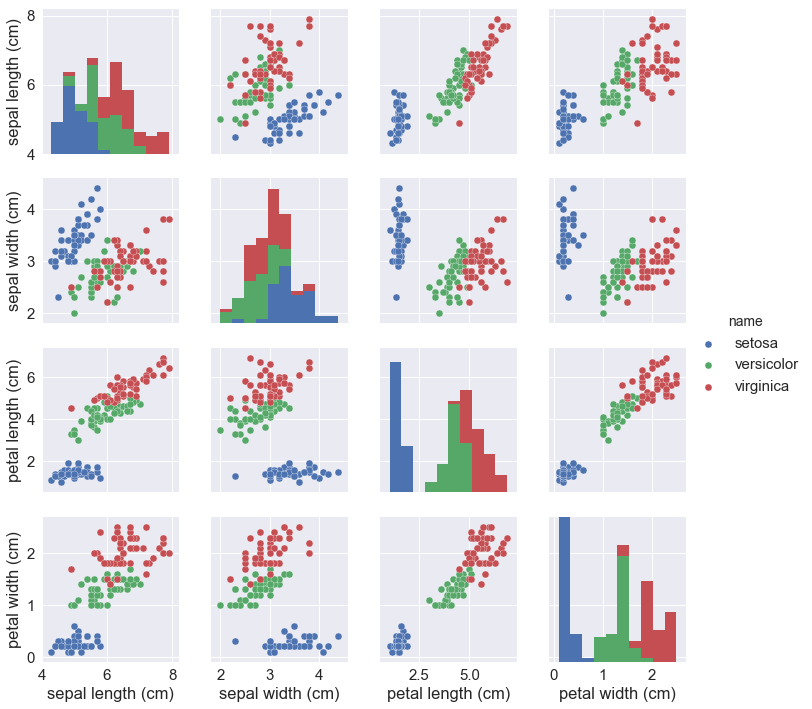

In [52]:
import seaborn as sns
sns.pairplot(iris_frame[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)','name']], hue = 'name')

# Descriptive Statistics 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000103C2D68>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000001248BB00>]], dtype=object)

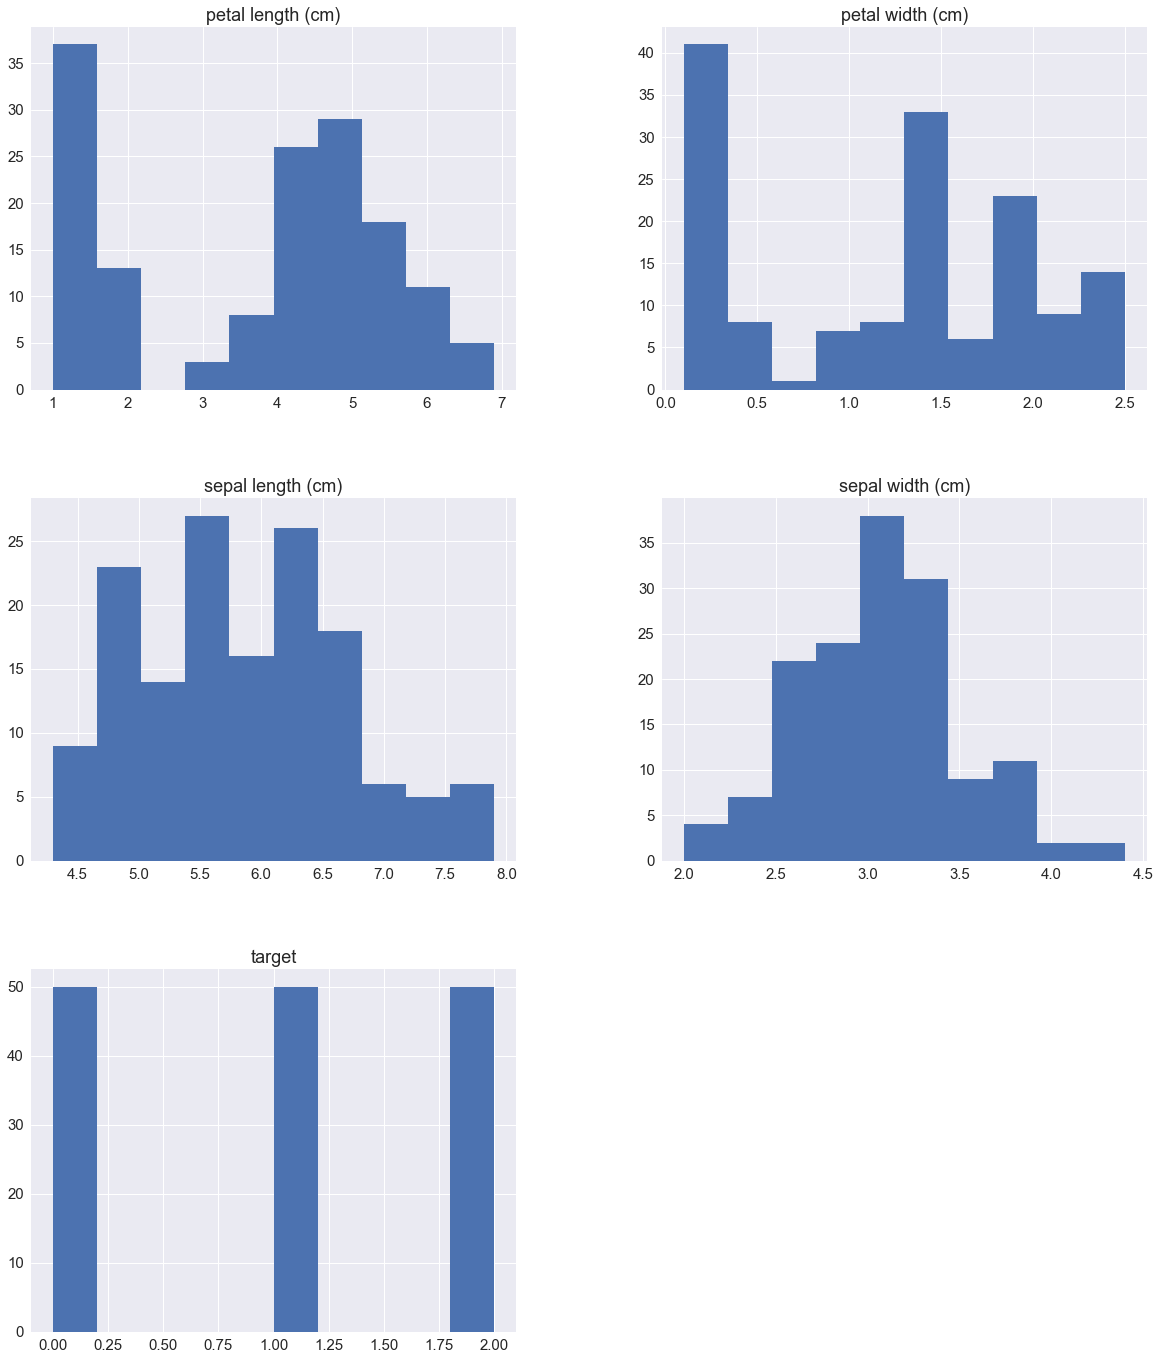

In [53]:
iris_frame.hist()

## Pearson correlation coefficient
https://en.wikipedia.org/wiki/Pearson_correlation_coefficient

In [54]:
iris_frame[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']].corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.109369,0.871754,0.817954
sepal width (cm),-0.109369,1.000000,-0.420516,-0.356544
petal length (cm),0.871754,-0.420516,1.000000,0.962757
petal width (cm),0.817954,-0.356544,0.962757,1.000000


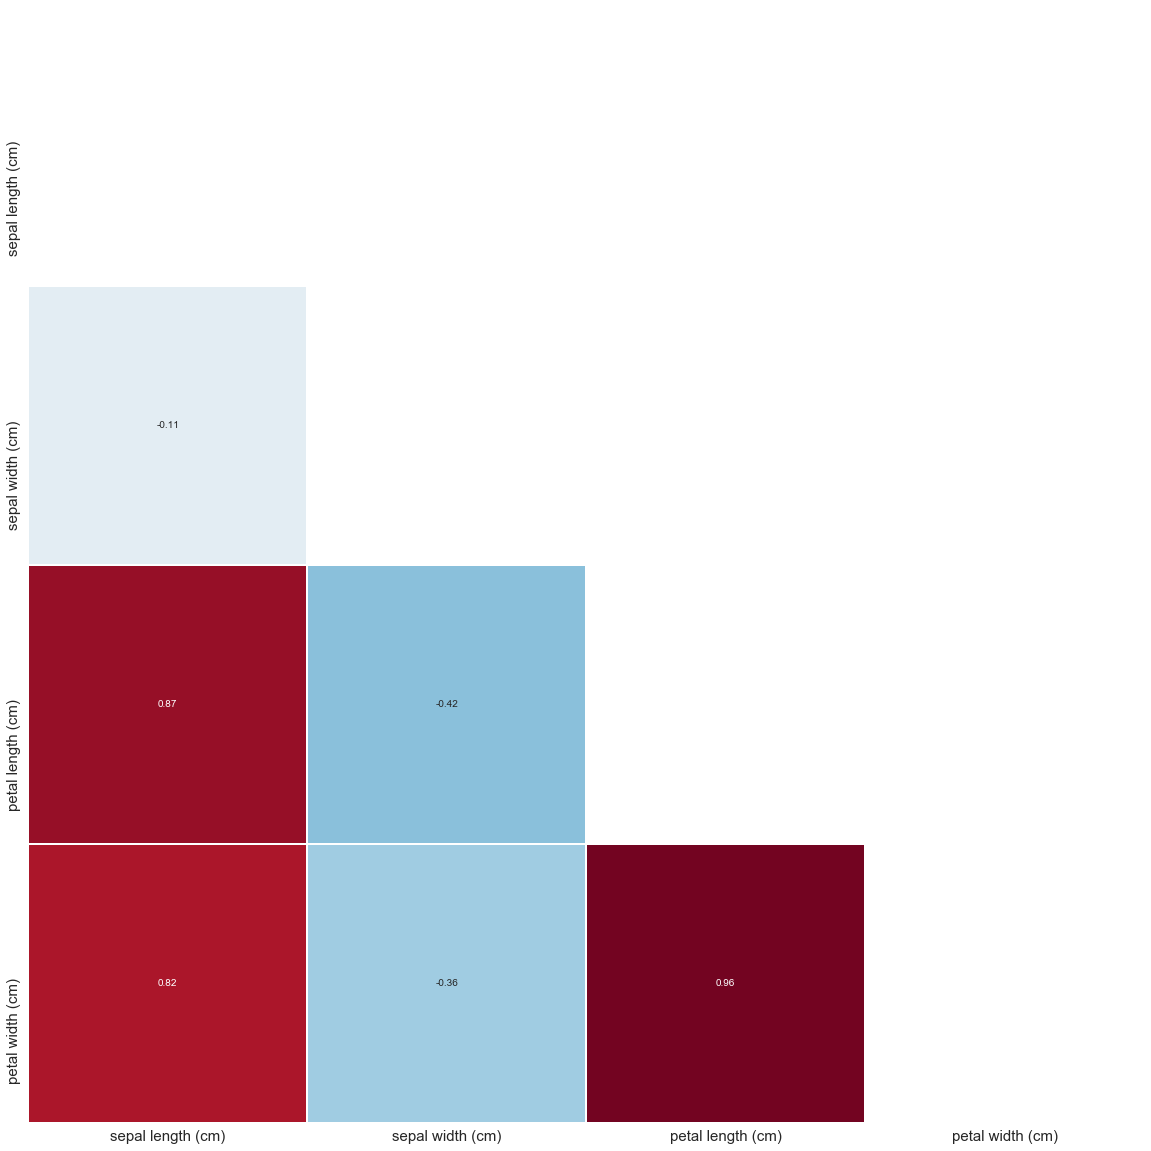

In [55]:
import seaborn as sns
corr = iris_frame[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']].corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
     ax = sns.heatmap(corr, mask=mask, square=True, cbar=False, annot=True, linewidths=.5)

## Кластеризация K-Means

In [56]:
train_data, test_data, train_labels, test_labels = cross_validation.train_test_split(iris_frame[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']], iris_frame[['target']], test_size = 0.3)

model = KMeans(n_clusters=3, random_state = 0)
model.fit(train_data)
model_predictions = model.predict(test_data)

print metrics.accuracy_score(test_labels, model_predictions)
print metrics.classification_report(test_labels, model_predictions)


0.266666666667
             precision    recall  f1-score   support

          0       0.00      0.00      0.00        17
          1       0.00      0.00      0.00        13
          2       1.00      0.80      0.89        15

avg / total       0.33      0.27      0.30        45



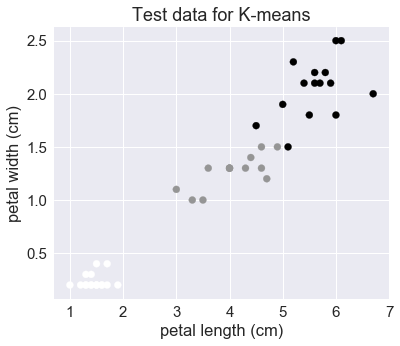

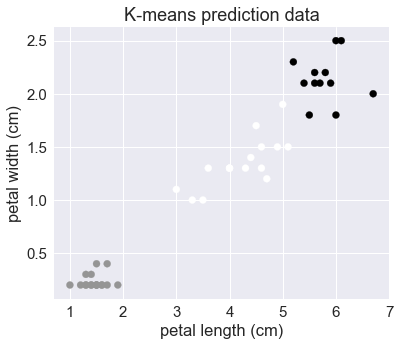

In [57]:
import matplotlib.pyplot as plt

fig = plt.figure(1, figsize=(6, 5))
plt.scatter(test_data['petal length (cm)'], test_data['petal width (cm)'], c=test_labels.astype(np.float))

plt.ylabel('petal width (cm)')
plt.xlabel('petal length (cm)')
plt.title('Test data for K-means')
plt.show()

fig = plt.figure(1, figsize=(6, 5))
plt.ylabel('petal width (cm)')
plt.xlabel('petal length (cm)')
plt.title('K-means prediction data')
plt.scatter(test_data['petal length (cm)'], test_data['petal width (cm)'], c=model_predictions.astype(np.float))

plt.show()

##  Классификация  - Stochastic Gradient Descent

In [58]:
# Разделяем данные на данные для обучения и тестовые данные:
train_data, test_data, train_labels, test_labels = cross_validation.train_test_split(iris_frame[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']], iris_frame[['target']], test_size = 0.3, random_state = 0)
#print train_data[:20] 
#print test_data[:20] 
#print train_labels[:20] 
#print test_labels[:20] 

# Создаем модель Stochastic Gradient Descent:
model = linear_model.SGDClassifier(alpha=0.001, n_iter=100, random_state = 0)
# Обучаем модель на 
model.fit(train_data, train_labels)
model_predictions = model.predict(test_data)

print "accuracy: ", metrics.accuracy_score(test_labels, model_predictions)
print metrics.classification_report(test_labels, model_predictions)



accuracy:  0.822222222222
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        16
          1       1.00      0.56      0.71        18
          2       0.58      1.00      0.73        11

avg / total       0.90      0.82      0.82        45



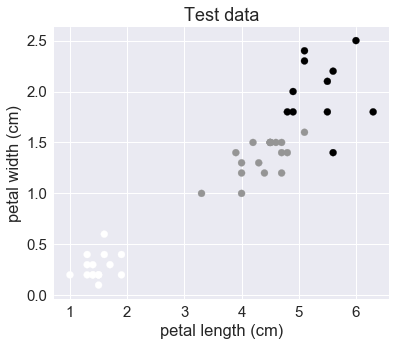

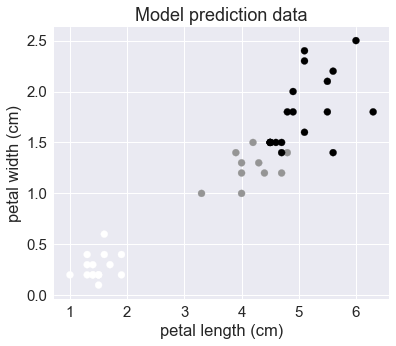

In [59]:
import matplotlib.pyplot as plt

fig = plt.figure(1, figsize=(6, 5))
plt.scatter(test_data['petal length (cm)'], test_data['petal width (cm)'], c=test_labels.astype(np.float))

plt.ylabel('petal width (cm)')
plt.xlabel('petal length (cm)')
plt.title('Test data')
plt.show()

fig = plt.figure(1, figsize=(6, 5))
plt.ylabel('petal width (cm)')
plt.xlabel('petal length (cm)')
plt.title('Model prediction data')
plt.scatter(test_data['petal length (cm)'], test_data['petal width (cm)'], c=model_predictions.astype(np.float))

plt.show()

## Линейная регрессия 2

In [60]:
from scipy import polyval, stats
fit_output = stats.linregress(iris_frame[['petal length (cm)','petal width (cm)']])
slope, intercept, r_value, p_value, slope_std_error = fit_output
print(slope, intercept, r_value, p_value, slope_std_error) 


(0.41641913228540123, -0.3665140452167277, 0.96275709705096657, 5.7766609884916033e-86, 0.009612539319328553)


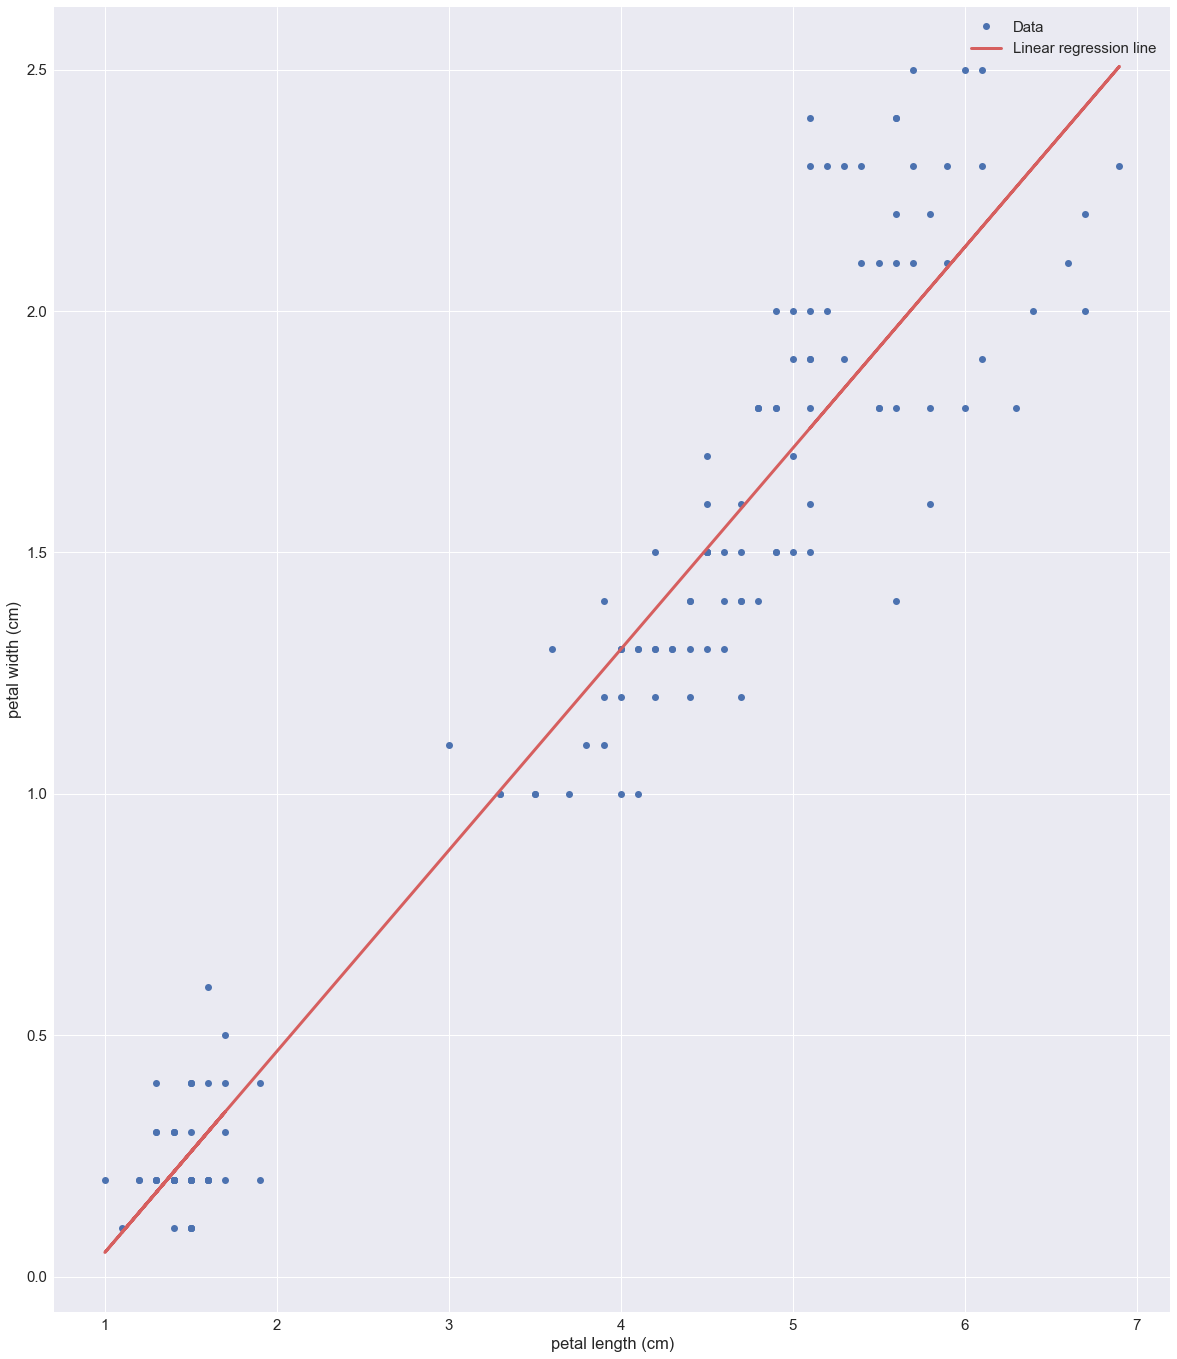

In [61]:
import matplotlib.pyplot as plt
plt.plot(iris_frame[['petal length (cm)']], iris_frame[['petal width (cm)']],'o', label='Data')
plt.plot(iris_frame[['petal length (cm)']], intercept + slope*iris_frame[['petal length (cm)']], 'r', linewidth=3, label='Linear regression line')
plt.ylabel('petal width (cm)')
plt.xlabel('petal length (cm)')
plt.legend()
plt.show()

## Нормализуем переменные

In [62]:
from sklearn import preprocessing
iris_frame['sepal length (cm) norm'] = preprocessing.normalize(iris_frame['sepal length (cm)'])[0]
iris_frame['sepal width (cm) norm'] = preprocessing.normalize(iris_frame['sepal width (cm)'])[0]
iris_frame['petal length (cm) norm'] = preprocessing.normalize(iris_frame['petal length (cm)'])[0]
iris_frame['petal width (cm) norm'] = norm = preprocessing.normalize(iris_frame['petal width (cm)'])[0]
iris_frame[:5]

            

C:\Users\Alexey.Sushkov\AppData\Local\Continuum\Anaconda3\envs\py27\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Users\Alexey.Sushkov\AppData\Local\Continuum\Anaconda3\envs\py27\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Users\Alexey.Sushkov\AppData\Local\Continuum\Anaconda3\envs\py27\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data eith

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,name,sepal length (cm) norm,sepal width (cm) norm,petal length (cm) norm,petal width (cm) norm
0,5.1,3.5,1.4,0.2,0,setosa,0.070563,0.092651,0.027546,0.011503
1,4.9,3.0,1.4,0.2,0,setosa,0.067795,0.079415,0.027546,0.011503
2,4.7,3.2,1.3,0.2,0,setosa,0.065028,0.084709,0.025579,0.011503
3,4.6,3.1,1.5,0.2,0,setosa,0.063645,0.082062,0.029514,0.011503
4,5.0,3.6,1.4,0.2,0,setosa,0.069179,0.095298,0.027546,0.011503


## SGDClassifier c нормализированными переменными

In [63]:
train_data, test_data, train_labels, test_labels = cross_validation.train_test_split(iris_frame[['sepal length (cm) norm','sepal width (cm) norm','petal length (cm) norm','petal width (cm) norm']], iris_frame['target'], test_size = 0.3)
model = linear_model.SGDClassifier(alpha=0.0009, n_iter=96, random_state = 0)
scores = cross_validation.cross_val_score(model, train_data, train_labels, cv=10)
print scores.mean()


0.675303030303


## Убираем переменные

In [64]:
train_data, test_data, train_labels, test_labels = cross_validation.train_test_split(iris_frame[['petal length (cm)','petal width (cm)']], iris_frame['target'], test_size = 0.3)

#print train_data
#print test_data[:2] 
#print train_labels
#print test_labels[:2] 

clf = linear_model.SGDClassifier(alpha=0.001, n_iter=100)
clf.fit(train_data, train_labels)

clf_predictions = clf.predict(test_data)

print metrics.accuracy_score(test_labels, clf_predictions)
print metrics.classification_report(test_labels, clf_predictions)


0.977777777778
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        12
          1       1.00      0.94      0.97        18
          2       0.94      1.00      0.97        15

avg / total       0.98      0.98      0.98        45



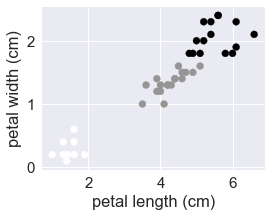

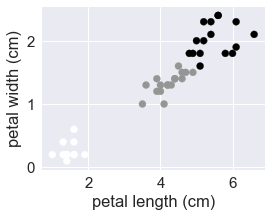

In [65]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

X1 = test_data
y1 = test_labels

X2 = test_data
y2 = clf_predictions

X1['petal length (cm)']

labels2 = y1
fignum = 1
fig = plt.figure(fignum, figsize=(4, 3))
plt.scatter(X1['petal length (cm)'], X1['petal width (cm)'], c=labels2.astype(np.float))
plt.ylabel('petal width (cm)')
plt.xlabel('petal length (cm)')
plt.show()

labels2 = y2
fig = plt.figure(fignum, figsize=(4, 3))
plt.scatter(X1['petal length (cm)'], X1['petal width (cm)'], c=labels2.astype(np.float))
plt.ylabel('petal width (cm)')
plt.xlabel('petal length (cm)')

plt.show()

## Убираем переменные 2

In [66]:
train_data, test_data, train_labels, test_labels = cross_validation.train_test_split(iris_frame[['petal length (cm)','petal width (cm)']], iris_frame['target'], test_size = 0.3)
model = linear_model.SGDClassifier(alpha=0.0009, n_iter=96, random_state = 0)
scores = cross_validation.cross_val_score(model, train_data, train_labels, cv=10)
print scores.mean()


0.919444444444


## Делаем новую переменную - площадь

In [67]:
iris_frame['petal_area'] = 0.0
for k in range(0,150):
    iris_frame['petal_area'][k] = iris_frame['petal length (cm)'][k] * iris_frame['petal width (cm)'][k]
    #print iris_frame['petal_area'][k]
    
print iris_frame[:10]

C:\Users\Alexey.Sushkov\AppData\Local\Continuum\Anaconda3\envs\py27\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   
5                5.4               3.9                1.7               0.4   
6                4.6               3.4                1.4               0.3   
7                5.0               3.4                1.5               0.2   
8                4.4               2.9                1.4               0.2   
9                4.9               3.1                1.5               0.1   

   target    name  sepal length (cm) norm  sepal width (cm) norm  \
0       0  setosa                0.070563               0.0926

## Загоняем площадь в модель 1

In [68]:
train_data, test_data, train_labels, test_labels = cross_validation.train_test_split(iris_frame[['petal_area','petal length (cm)','petal width (cm)']], iris_frame['target'], test_size = 0.3)

#print train_data
#print test_data[:2] 
#print train_labels
#print test_labels[:2] 

clf = linear_model.SGDClassifier(alpha=0.001, n_iter=100)
clf.fit(train_data[['petal_area']], train_labels)

clf_predictions = clf.predict(test_data[['petal_area']])

print metrics.accuracy_score(test_labels, clf_predictions)
print metrics.classification_report(test_labels, clf_predictions)

0.955555555556
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        12
          1       0.93      0.93      0.93        14
          2       0.95      0.95      0.95        19

avg / total       0.96      0.96      0.96        45



## Загоняем площадь в модель 2

In [69]:
train_data, test_data, train_labels, test_labels = cross_validation.train_test_split(iris_frame[['petal_area']], iris_frame['target'], test_size = 0.3)
model = linear_model.SGDClassifier(alpha=0.0009, n_iter=96, random_state = 0)
scores = cross_validation.cross_val_score(model, train_data, train_labels, cv=10)
print scores.mean()



0.93


## Подбор оптимальных параметров алгоритма

In [70]:
from sklearn import grid_search

train_data, test_data, train_labels, test_labels = cross_validation.train_test_split(iris_frame[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']], iris_frame['target'], test_size = 0.3)

parameters_grid = {
    'n_iter' : range(5,100),
    'alpha' : np.linspace(0.0001, 0.001, num = 10),
}

classifier = linear_model.SGDClassifier(random_state = 0)
cv = cross_validation.StratifiedShuffleSplit(train_labels, n_iter = 10, test_size = 0.3, random_state = 0)
grid_cv = grid_search.GridSearchCV(classifier, parameters_grid, scoring = 'accuracy', cv = cv)
grid_cv.fit(train_data, train_labels)

print grid_cv.best_estimator_

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=84, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=0, shuffle=True, verbose=0,
       warm_start=False)


In [71]:
print grid_cv.best_score_
print grid_cv.best_params_

0.909375
{'alpha': 0.0001, 'n_iter': 84}


## Подставляем оптимальные значения в модель

In [72]:
train_data, test_data, train_labels, test_labels = cross_validation.train_test_split(iris_frame[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']], iris_frame['target'], test_size = 0.3)
model = linear_model.SGDClassifier(alpha=0.0009, n_iter=96, random_state = 0)
scores = cross_validation.cross_val_score(model, train_data, train_labels, cv=10)
print scores.mean()


0.887373737374


## Кросс валидация
http://scikit-learn.org/stable/modules/cross_validation.html
https://habrahabr.ru/post/202090/

In [73]:

train_data, test_data, train_labels, test_labels = cross_validation.train_test_split(iris_frame[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']], iris_frame['target'], test_size = 0.3)
model = linear_model.SGDClassifier(alpha=0.001, n_iter=100, random_state = 0)
scores = cross_validation.cross_val_score(model, train_data, train_labels, cv=10)
print scores.mean()

0.891919191919
